In [12]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pylab as pl
import time

In [2]:
def Beale (x,y):
    f1=(1.5-x+x*y)**2
    f2=(2.25-x+x*y**2)**2
    f3=(2.2625-x+x*y**3)**2
    f_result=f1+f2+f3
    
    return f_result

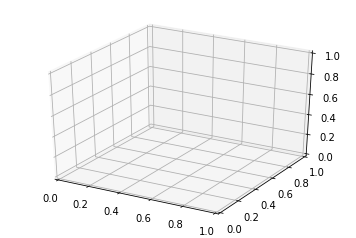

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

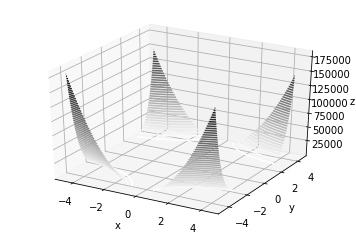

In [4]:
x_test=np.arange(-4.5,4.5,0.1)
y_test=np.arange(-4.5,4.5,0.1)
X, Y = np.meshgrid(x_test, y_test)
z_test=Beale(X,Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,z_test,50,cmap='binary')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [14]:
T_initial=1000 #Temperature
T_final=10 #Minimum Temperature

x=np.random.uniform(-4.5,4.5) #Generate initial X value
y=np.random.uniform(-4.5,4.5) #Generate initial Y value
print(x)
print(y)
k=1000 #steps

t=0  #time

R_initial=0 #initial Result

R_xarray=[] #array for plot
T_array=[]
R_yarray=[]

2.6715252666003897
-3.525057704018052


In [13]:
ts=time.time()
while T_initial>=T_final:
    for i in range(k): #Steps
        
        R_initial=Beale(x,y) #Run initial Result
    
        x_Next=x+np.random.uniform(-0.001,0.001)*T_initial #Generate New X Value
        y_Next=y+np.random.uniform(-0.001,0.001)*T_initial #Generate New Y Value
 
        
        #print(R_initial,"  //  ",R_Next)
        R_xarray.append(R_initial)  #Create array for plot
        T_array.append(T_initial)  #Create array for plot
        
        
        if (-4.5<=x_Next and x_Next<=4.5 and -4.5<=y_Next and y_Next<=4.5): #Set constrains
            R_Next=Beale(x_Next,y_Next) #Run Beale Result
            if R_Next-R_initial<0: #Optimizing
                x=x_Next
                y=y_Next
            else:
                p=math.exp(-(R_Next-R_initial)/T_initial)
                r=np.random.uniform(0,1)
                if r<p:
                    x=x_Next
                    
        R_yarray.append(R_Next) #Create array for plot

    t+=1 #Cooling Sequence
    T_initial=1000/(1+t) #Cooling Sequence
    
te=time.time()
    
print(x,"  //  ",y,"  //  ",R_initial)
print("Run Time :",te-ts)

-2.7135641705640716   //   1.2622603431962907   //   1.2638358468243753
Run Time : 0.00036406517028808594


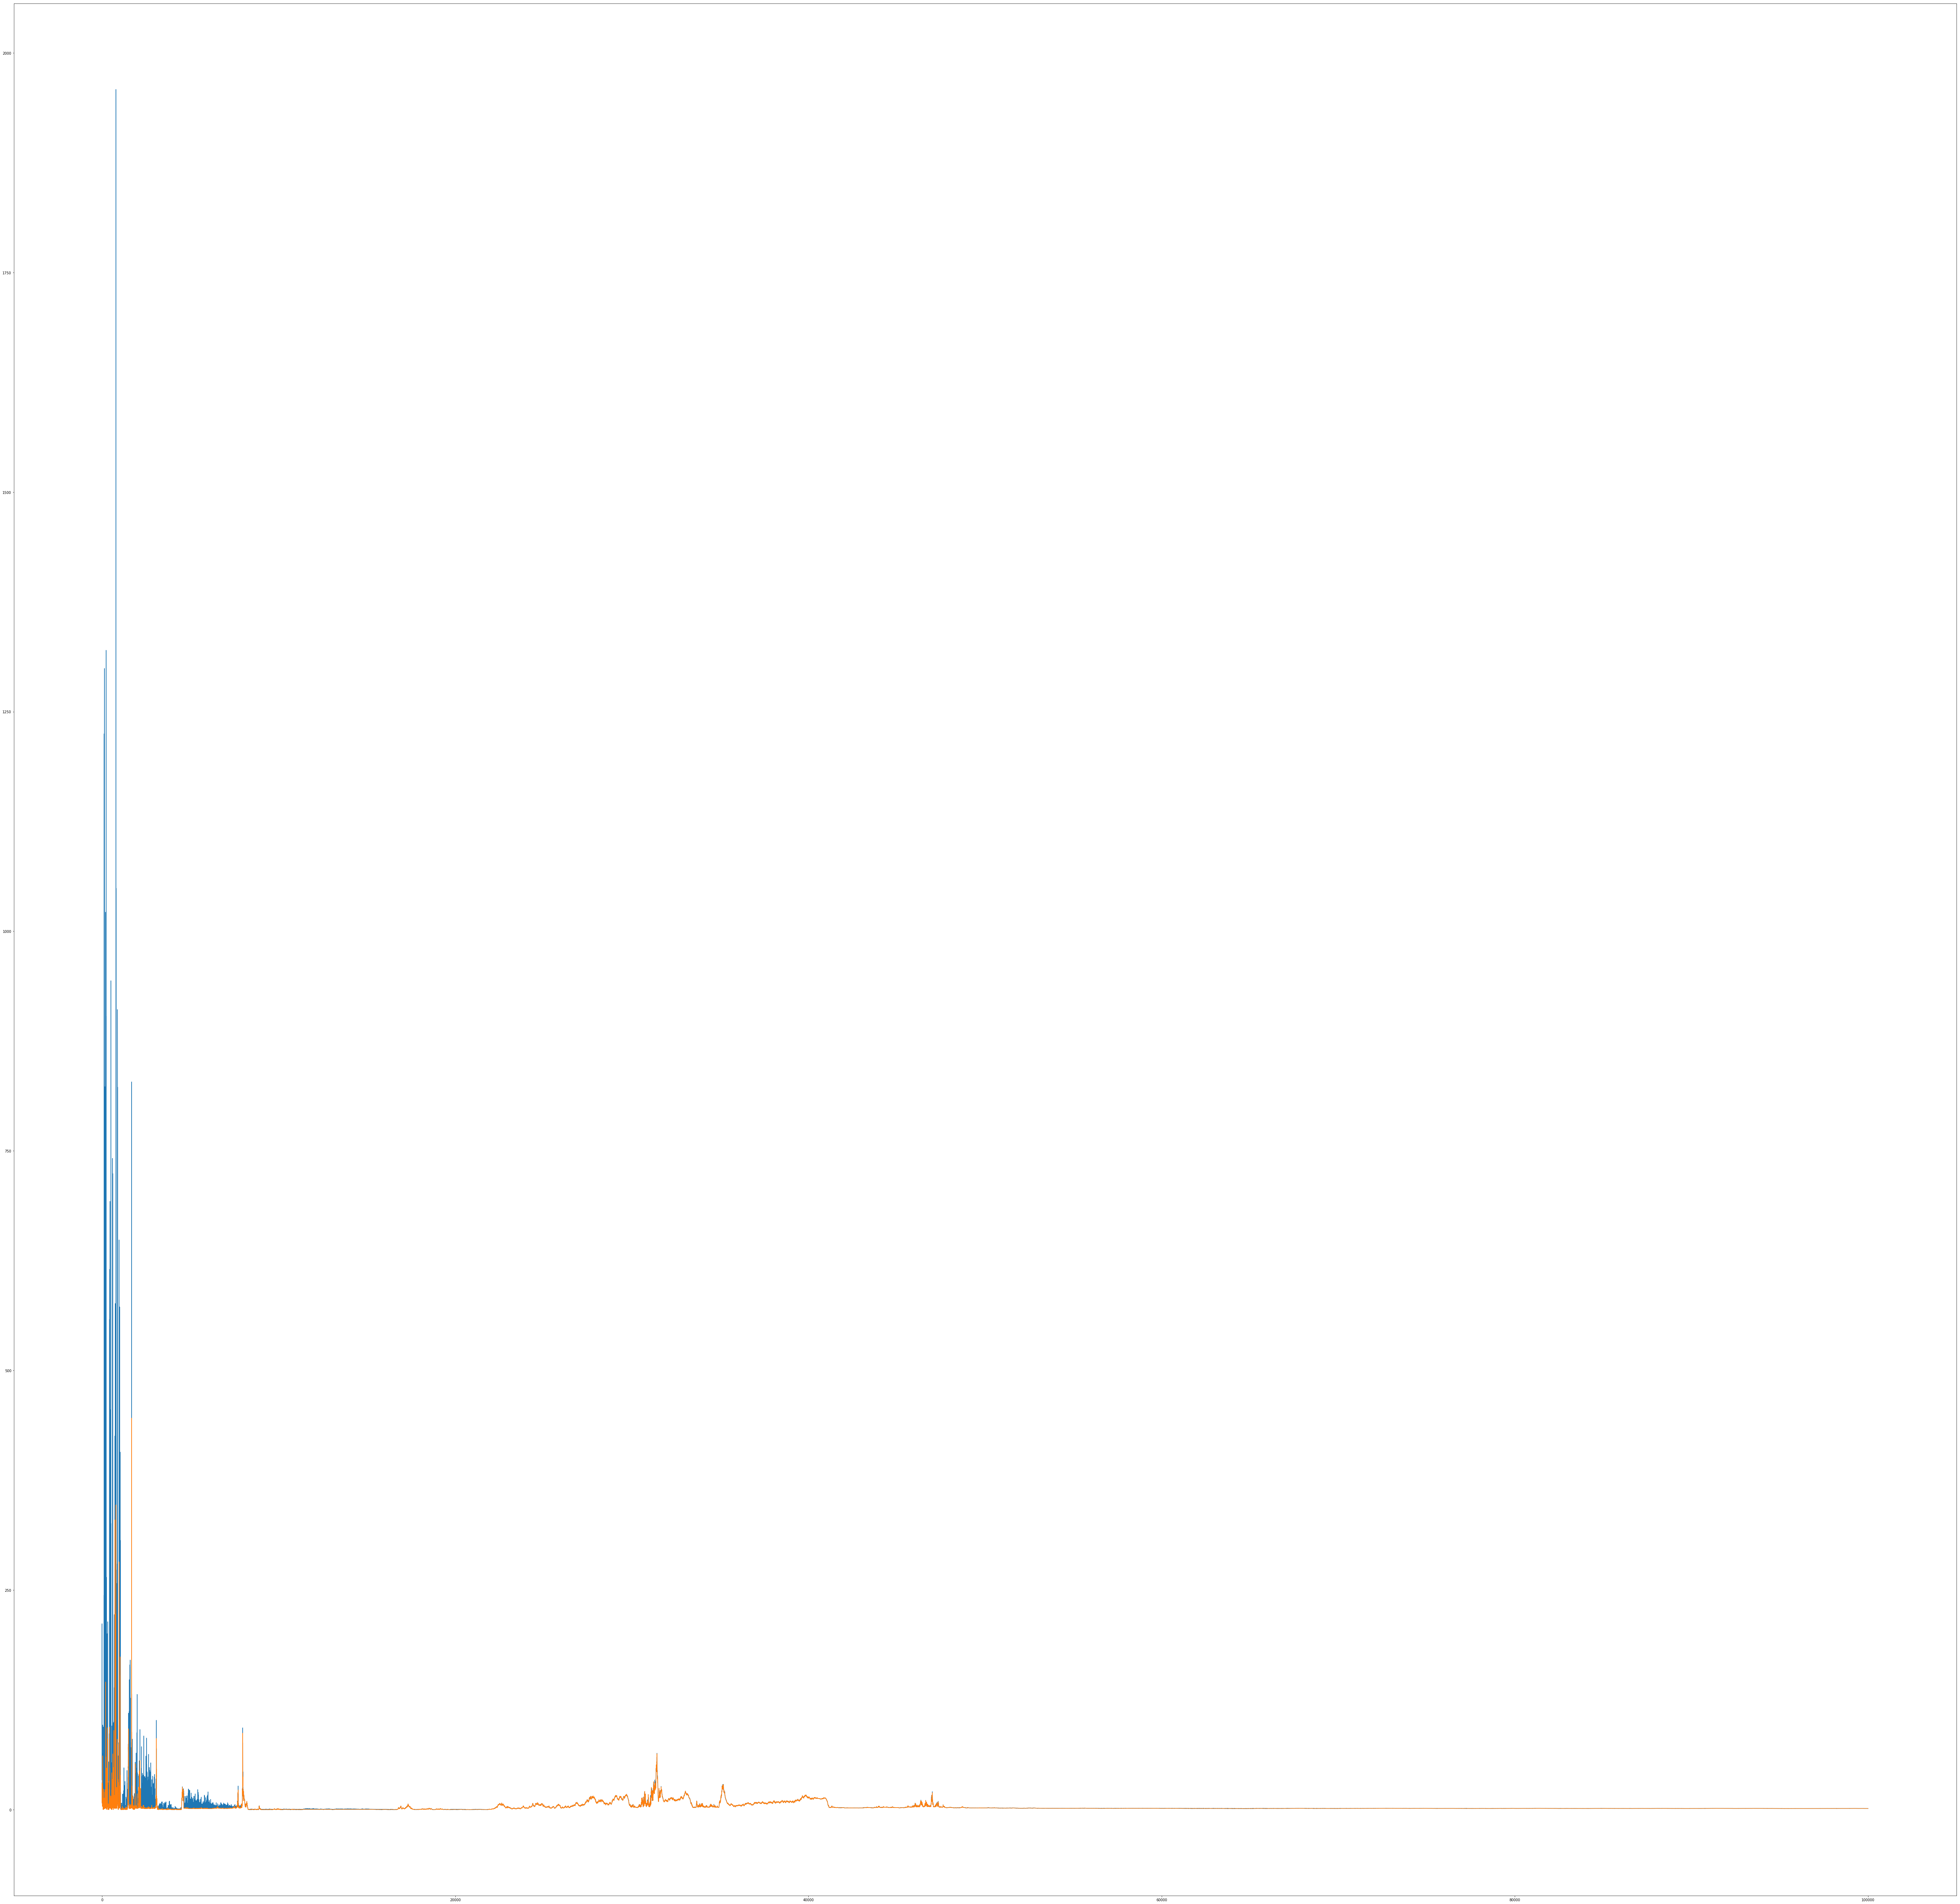

In [9]:
pl.figure(figsize=(100, 100)) #create large size for plot
plt.plot(R_yarray)
plt.plot(R_xarray)

plt.savefig('/Users/WanYi/Desktop/Heuristic Optimization/HW1/Q1/Q1.png')